In [ ]:
'''
"I (We) certify that the code and data in this assignment were generated independently,
using only the tools and resources defined in the course and that I (we) did not receive
any external help, coaching or contributions during the production of this work."
'''

'\n"I (We) certify that the code and data in this assignment were generated independently,\nusing only the tools and resources defined in the course and that I (we) did not receive\nany external help, coaching or contributions during the production of this work."\n'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
!pwd  #Present Working Director


/content


In [ ]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [ ]:

%cd ..
%cd /content/drive/MyDrive



/
/content/drive/MyDrive


In [ ]:
df=pd.read_csv("penguins.csv")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [ ]:
df.shape

(344, 8)

In [ ]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [ ]:
df.columns


Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [ ]:
df["species"]=df["species"].astype('category')
df["island"]=df["island"].astype('category')
df["sex"]=df["sex"].astype('category')

In [ ]:
df.dtypes

species              category
island               category
bill_length_mm        float64
bill_depth_mm         float64
flipper_length_mm     float64
body_mass_g           float64
sex                  category
year                    int64
dtype: object

In [ ]:
n_species=(df['species'].value_counts())
print(n_species)

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64


In [ ]:
n_islands=df['island'].value_counts()
print(n_islands)

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64


# The feilds species, islands and sex need to be mapped to numeric values
## We use 0 for female and 1 for male
## we use 1 for the species Adelie, 2 for the species Gentoo and 3 for the species Chinstrap
## We use 1 for Biscoe 2 for Dream and 3 for Torgersen



In [ ]:
df['sex'].replace(['female','male'],[0,1],inplace=True)
df['species'].replace(['Adeloe','Gento','chinstrap'],[1,2,3],inplace=True)
df['island'].replace(['Biscoe','Dream','Torgersen'],[1,2,3],inplace=True)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,3,39.1,18.7,181.0,3750.0,1.0,2007
1,Adelie,3,39.5,17.4,186.0,3800.0,0.0,2007
2,Adelie,3,40.3,18.0,195.0,3250.0,0.0,2007
3,Adelie,3,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,3,36.7,19.3,193.0,3450.0,0.0,2007


In [ ]:
df.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
339,Chinstrap,2,55.8,19.8,207.0,4000.0,1.0,2009
340,Chinstrap,2,43.5,18.1,202.0,3400.0,0.0,2009
341,Chinstrap,2,49.6,18.2,193.0,3775.0,1.0,2009
342,Chinstrap,2,50.8,19.0,210.0,4100.0,1.0,2009
343,Chinstrap,2,50.2,18.7,198.0,3775.0,0.0,2009


In [ ]:
df.describe()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,344.000000,342.000000,342.000000,342.000000,342.000000,333.000000,344.000000
mean,1.662791,43.921930,17.151170,200.915205,4201.754386,0.504505,2008.029070
std,0.726194,5.459584,1.974793,14.061714,801.954536,0.500732,0.818356
min,1.000000,32.100000,13.100000,172.000000,2700.000000,0.000000,2007.000000
25%,1.000000,39.225000,15.600000,190.000000,3550.000000,0.000000,2007.000000
50%,2.000000,44.450000,17.300000,197.000000,4050.000000,1.000000,2008.000000
75%,2.000000,48.500000,18.700000,213.000000,4750.000000,1.000000,2009.000000
max,3.000000,59.600000,21.500000,231.000000,6300.000000,1.000000,2009.000000


# Data Cleaning
## Removing nan not a number values

In [ ]:
print(df.isnull().values.any())
print("Total count of all null values",df.isnull().sum().sum())


True
Total count of all null values 19


In [ ]:
df=df.dropna()

In [ ]:
print(df.isnull().values.any())
print("Total count of all null values",df.isnull().sum().sum())

False
Total count of all null values 0


Normalize non-categorical features 

In [ ]:
def normalize(feature):
  mx=df[feature].max()
  mi=df[feature].min()


  df[feature]=(df[feature]-mi)/(mx-mi)
  print("Maximum Value of",feature,mx,"Minimum Value of ",feature,mi)


In [ ]:
'''
normalize('bill_length_mm')
normalize('bill_depth_mm')
normalize('flipper_length_mm')
normalize('body_mass_g')
'''

"\nnormalize('bill_length_mm')\nnormalize('bill_depth_mm')\nnormalize('flipper_length_mm')\nnormalize('body_mass_g')\n"

In [ ]:
df.describe()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,1.651652,43.992793,17.164865,200.966967,4207.057057,0.504505,2008.042042
std,0.714715,5.468668,1.969235,14.015765,805.215802,0.500732,0.812944
min,1.000000,32.100000,13.100000,172.000000,2700.000000,0.000000,2007.000000
25%,1.000000,39.500000,15.600000,190.000000,3550.000000,0.000000,2007.000000
50%,2.000000,44.500000,17.300000,197.000000,4050.000000,1.000000,2008.000000
75%,2.000000,48.600000,18.700000,213.000000,4775.000000,1.000000,2009.000000
max,3.000000,59.600000,21.500000,231.000000,6300.000000,1.000000,2009.000000


In [ ]:
df.corr()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
island,1.000000,-0.337179,0.568031,-0.554413,-0.559526,-0.012435,-0.042111
bill_length_mm,-0.337179,1.000000,-0.228626,0.653096,0.589451,0.344078,0.032657
bill_depth_mm,0.568031,-0.228626,1.000000,-0.577792,-0.472016,0.372673,-0.048182
flipper_length_mm,-0.554413,0.653096,-0.577792,1.000000,0.872979,0.255169,0.151068
body_mass_g,-0.559526,0.589451,-0.472016,0.872979,1.000000,0.424987,0.021862
sex,-0.012435,0.344078,0.372673,0.255169,0.424987,1.000000,-0.000467
year,-0.042111,0.032657,-0.048182,0.151068,0.021862,-0.000467,1.000000


Body mass has high correlation with flipper length, negative correlation with island and bill depth, the least amount of orrelation with year, hence we neglect year as our feature and take all other columns as features, and rows as no. of samples


## Target Variable Y is body mass (Continous variable)
## Input features bill_length_mm,	bill_depth_mm, flipper_length_mm, sex, species


In [ ]:
#Output  N x 1 dim
Y=df['body_mass_g']
print(Y)
print(Y.shape)

0      3750.0
1      3800.0
2      3250.0
4      3450.0
5      3650.0
        ...  
339    4000.0
340    3400.0
341    3775.0
342    4100.0
343    3775.0
Name: body_mass_g, Length: 333, dtype: float64
(333,)


In [ ]:
#Input  N x 1 dim

X = pd.concat([df['flipper_length_mm']], axis = 1)
print(X)

     flipper_length_mm
0                181.0
1                186.0
2                195.0
4                193.0
5                190.0
..                 ...
339              207.0
340              202.0
341              193.0
342              210.0
343              198.0

[333 rows x 1 columns]


# Now we have to train to find the weight vector W which tells us how much does each of the 4 feature contrubute to your prediction

In [ ]:
#We shuffle our dataframe and then select the first 80% as train and last 20% as test
shuffled_df=df.sample(frac=1)
shuffled_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
88,Adelie,2,38.3,19.2,189.0,3950.0,1.0,2008
210,Gentoo,1,43.2,14.5,208.0,4450.0,0.0,2008
150,Adelie,2,36.0,17.1,187.0,3700.0,0.0,2009
148,Adelie,2,36.0,17.8,195.0,3450.0,0.0,2009
188,Gentoo,1,42.6,13.7,213.0,4950.0,0.0,2008


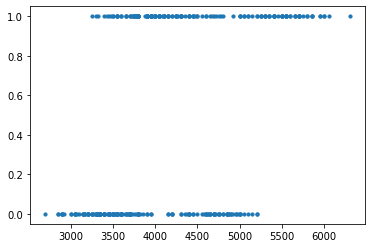

In [ ]:
plt.scatter(df['body_mass_g'],df['sex'],s=10)
plt.show()

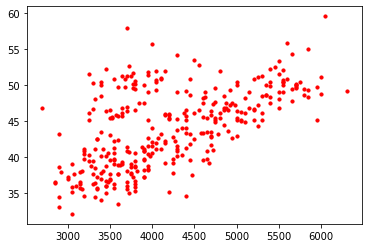

In [ ]:
plt.scatter(df['body_mass_g'],df['bill_length_mm'],color='red',s=10)
plt.show()

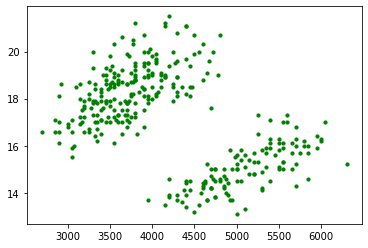

In [ ]:
plt.scatter(df['body_mass_g'],df['bill_depth_mm'],color='green',s=10)
plt.show()

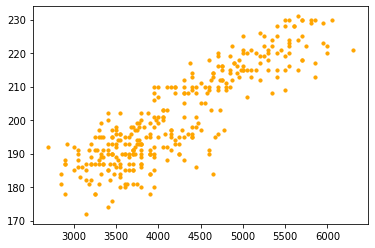

In [ ]:
plt.scatter(df['body_mass_g'],df['flipper_length_mm'],color='orange',s=10)
plt.show()

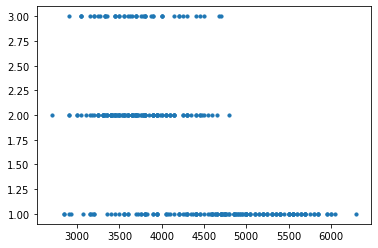

In [ ]:
plt.scatter(df['body_mass_g'],df['island'],s=10)
plt.show()

# From the above visualization bill depth, flipper length and bill length seem good fratures to pick for linear regression

In [ ]:
training_size= int(len(shuffled_df)*0.8)
train_df=shuffled_df[:training_size]
test_df=shuffled_df[training_size:]

X_train= pd.concat([train_df['bill_length_mm'],train_df['bill_depth_mm'],train_df['flipper_length_mm']], axis = 1)
Y_train=train_df['body_mass_g']

x_test= pd.concat([test_df['bill_length_mm'],test_df['bill_depth_mm'],test_df['flipper_length_mm']],axis=1)
y_test=test_df['body_mass_g']


In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(x_test.shape)
print(y_test.shape)

(266, 3)
(266,)
(67, 3)
(67,)


In [ ]:
X_mean = np.mean(X_train)
print(X_mean)

bill_length_mm        44.098496
bill_depth_mm         17.132331
flipper_length_mm    201.281955
dtype: float64


In [ ]:
#np.mean(X_train)
X_train.mean(axis=0)


bill_length_mm        44.098496
bill_depth_mm         17.132331
flipper_length_mm    201.281955
dtype: float64

In [ ]:
from re import S

class LinRegression():

  def __init__(self,alpha=0.000001,n=100000) -> None:
      
      self.learning_rate = alpha
      self.number_of_iterations = n
      self.loss=[]


  def fit(self,X_train,Y_Train):

    m,n=X_train.shape

    self.weights=np.random.uniform(0,1,n)
    self.bias=0
    Y_mean = Y_train.mean()
    for i in range(self.number_of_iterations):
      #𝒘 = (𝑿.T*𝑿)^-1 X (𝑿.𝑇*y)                                 # Forumla for Ordinary least square  
     weights1 = np.dot(X_train.T,X_train)
     weights1inv=np.linalg.inv(weights1)
     weights2 = np.dot(X_train.T,Y_train)
     dw = np.dot(weights1inv,weights2)                            # Finding weights using OLS
     Y_predicted = np.dot(X_train, self.weights) + self.bias
     self.bias = Y_mean - (np.mean(self.weights*np.mean(X_train))) # Finding bias - difference between mean of y value and X value
     self.bias -= self.learning_rate * self.bias                   #Updating the bias
     self.weights -= self.learning_rate * dw                       #Updating the weights
     #print(self.bias,self.weights)
     #self.bias = (1 /m) * np.sum(Y_predicted - Y_train)
   
      #b0 = y_mean - (b1 * x_mean)

  def predict(self,x_test,y_test):

    Y_hat=np.dot(x_test,self.weights)+self.bias
    
    Y_Class=[]

    print("Weights for linear regression",self.weights)
    print("Bias for linear regression", self.bias)

    for i in range(len(Y_hat)):
      Y_Class.append(Y_hat[i])
    return Y_hat

def mean_squared_error(Y_train, Y_predicted):
        return np.mean((Y_train - Y_predicted) ** 2)


In [87]:
model = LinRegression(0.00001,10000) 
model.fit(X_train, Y_train)
predictions = model.predict(x_test,y_test)
print(predictions)

Weights for linear regression [0.78366599 1.33118088 0.10488077]
Bias for linear regression 4193.522364148482
[4274.57177705 4269.2923489  4276.86167819 4272.75862693 4266.92181079
 4272.89212449 4276.39891356 4266.88882666 4271.77889826 4281.65343092
 4263.35938748 4278.52187208 4271.90214324 4281.20242546 4266.48035259
 4279.04047781 4278.33971433 4268.75327714 4271.60455979 4267.85481332
 4268.40795857 4272.22064963 4268.04020646 4276.31273252 4270.18538842
 4275.49120614 4264.56551877 4280.76928981 4267.84821875 4272.41772531
 4276.87949034 4270.31346652 4272.63610257 4269.08704181 4270.9499369
 4267.03728046 4275.88089337 4269.86372892 4277.93519063 4272.54563565
 4269.05497873 4269.20793012 4272.78703765 4265.25405248 4270.75832786
 4268.96051829 4267.23010775 4266.2559663  4275.24013711 4279.13035436
 4274.31545229 4276.00825649 4273.6940684  4270.66588374 4270.19034614
 4265.70345457 4271.32596842 4271.50291359 4268.92938191 4270.60739279
 4272.14186525 4267.09593836 4265.99632

In [88]:
print("Mean squared error: ",mean_squared_error(y_test,predictions))

Mean squared error:  565620.4014143231


In [ ]:
import seaborn as sns

In [ ]:
sns.set_theme(color_codes=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


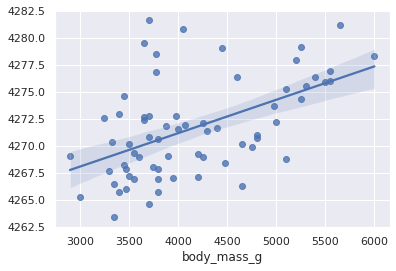

In [89]:
sns.regplot(y_test,predictions)


# Ridge Regression

##Using same preprocessing data for ridge as well.


In [ ]:
from re import S

class RidgeRegression():

  def __init__(self,alpha=0.000001,n=100000) -> None:
      
      self.learning_rate = alpha
      self.number_of_iterations = n
      self.loss=[]


  def fit(self,X_train,Y_Train):

    m,n=X_train.shape

    self.weights=np.random.uniform(0,1,n)
    self.bias=0
    Y_mean = Y_train.mean()
    I_matrix = np.ones((3,3))
    lbda = 10
    #prod2=(1/2)*lbda*np.dot(self.weights.T,self.weights)
    #print("matrix = ",prod2)
    for i in range(self.number_of_iterations):
                                                                  # Forumla for Ridge regression
     weights1 = np.dot(X_train.T,X_train)+ lbda*I_matrix
     weights1inv=np.linalg.inv(weights1)
     weights2 = np.dot(X_train.T,Y_train)
     dw = np.dot(weights1inv,weights2)                            # Finding weights using OLS
     Y_predicted = np.dot(X_train, self.weights) + self.bias
     self.bias = Y_mean - (np.mean(self.weights*np.mean(X_train))) # Finding bias - difference between mean of y value and X value
     self.bias -= self.learning_rate * self.bias                   #Updating the bias
     self.weights -= self.learning_rate * dw                       #Updating the weights
     #print(self.bias,self.weights)
     #self.bias = (1 /m) * np.sum(Y_predicted - Y_train)
      #b0 = y_mean - (b1 * x_mean)

  def predict(self,x_test,y_test):

    Y_hat=np.dot(x_test,self.weights)+self.bias
    
    Y_Class=[]

    print("Weights for linear regression",self.weights)
    print("Bias for linear regression", self.bias)

    for i in range(len(Y_hat)):
      Y_Class.append(Y_hat[i])
    return Y_hat

  def mean_squared_error(self,Y_train, Y_predicted):
    lbda=10
    prod1=np.mean((Y_train - Y_predicted) ** 2)
    prod2=(1/2)*lbda*np.dot(self.weights.T,self.weights)
    return (prod1+prod2)


In [90]:
model = RidgeRegression(0.00001,10000) 
model.fit(X_train, Y_train)
predictions = model.predict(x_test,y_test)
print(predictions)

Weights for linear regression [0.84230836 0.06230377 0.2049406 ]
Bias for linear regression 4193.193215026272
[4272.37388794 4266.05391521 4275.659175   4269.29443779 4263.60113577
 4272.35932906 4279.87984168 4265.2525095  4270.615403   4280.25035649
 4264.06790077 4277.22041493 4270.46829949 4287.25000785 4264.86397943
 4278.328161   4282.3376567  4275.49384932 4276.91630722 4263.92264687
 4266.71557858 4277.53973497 4264.38680183 4272.01089826 4274.43299477
 4281.96539925 4263.12419265 4278.7285759  4266.78645235 4272.70928908
 4282.5054995  4267.70471302 4271.52207031 4268.93907183 4275.8438523
 4272.64098941 4282.21156991 4276.18757492 4283.27722556 4269.63698667
 4266.71796116 4274.83722153 4271.77357504 4265.00661627 4268.36728673
 4266.06903598 4264.8963191  4272.35447798 4280.05629042 4283.37482048
 4276.55155384 4279.73658597 4277.97810805 4275.58611719 4266.76009454
 4263.83571307 4270.9526108  4269.35788638 4266.30926773 4268.11578201
 4270.36005048 4263.52046827 4262.87716

In [82]:
model.mean_squared_error(y_test,predictions)

566957.2313907435

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


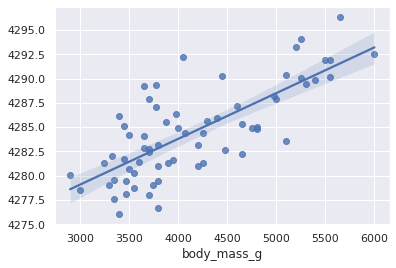

In [83]:
sns.regplot(y_test,predictions)